In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Paths
train_path = "../cleaned_data/train_clean.csv"
test_path = "../cleaned_data/test_clean.csv"

# Load
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)


train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,3,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,4,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,3,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,4,...,False,False,False,False,True,False,False,False,True,False


In [4]:
train.shape

(1460, 231)

In [5]:
test.shape

(1459, 230)

In [7]:
train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=231)

In [ ]:
neigh_cols = [col for col in train.columns if col.startswith("Neighborhood_")]
train["Neighborhood"] = train[neigh_cols].idxmax(axis=1).str.replace("Neighborhood_", "")
train = train.drop(columns=neigh_cols)
train.to_csv("train_tableau.csv", index=False)


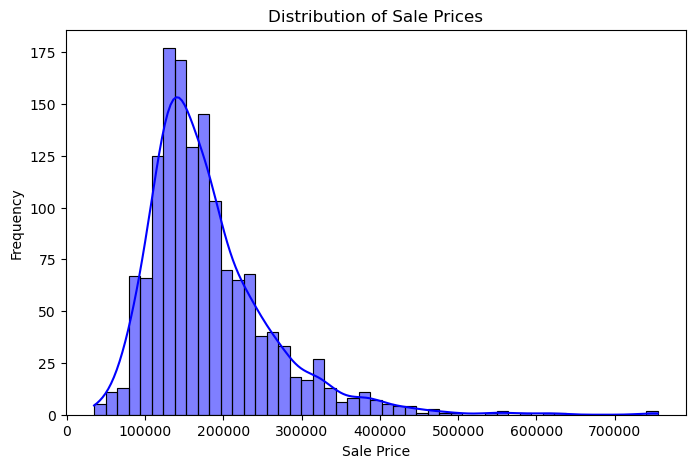

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(train['SalePrice'], kde=True, color="blue")
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()


In [ ]:
corr.tail(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
SaleType_ConLI,-0.058765,-0.001244,0.009412,0.001076,0.004269,0.001299,0.002975,0.011175,0.015601,0.020842,...,1.000000,-0.003436,-0.017701,-0.002660,-0.150198,-0.003073,-0.005337,-0.006909,-0.003139,-0.017938
SaleType_ConLw,-0.020738,0.014005,-0.051237,-0.015040,-0.021172,-0.019779,-0.023431,-0.039952,-0.022686,-0.020003,...,-0.003436,1.000000,-0.017701,-0.002660,-0.150198,-0.003073,-0.005337,-0.006909,0.027414,-0.017938
SaleType_New,-0.018998,-0.045156,0.122643,0.020039,0.327412,-0.156175,0.346954,0.325647,0.165692,0.391048,...,-0.017701,-0.017701,1.000000,-0.013702,-0.773680,-0.015827,-0.027489,-0.035587,-0.645698,0.986819
SaleType_Oth,0.038920,-0.014555,-0.023338,-0.005722,-0.057962,-0.050663,0.012122,-0.011431,-0.025899,-0.031292,...,-0.002660,-0.002660,-0.013702,1.000000,-0.116263,-0.002378,-0.004131,-0.005348,-0.097031,-0.013885
SaleType_WD,0.026133,0.026359,-0.090900,-0.002292,-0.225013,0.163684,-0.238463,-0.182733,-0.128187,-0.269804,...,-0.150198,-0.150198,-0.773680,-0.116263,1.000000,0.020457,0.035530,0.028599,0.634322,-0.769559
SaleCondition_AdjLand,-0.034852,0.016241,-0.036696,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011783,-0.036145,...,-0.003073,-0.003073,-0.015827,-0.002378,0.020457,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,-0.018572,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.013748,-0.049563,...,-0.005337,-0.005337,-0.027489,-0.004131,0.035530,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,0.013666,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009535,-0.050478,...,-0.006909,-0.006909,-0.035587,-0.005348,0.028599,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,-0.073047,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.081539,-0.184302,...,-0.003139,0.027414,-0.645698,-0.097031,0.634322,-0.112080,-0.194663,-0.252006,1.000000,-0.654323
SaleCondition_Partial,-0.020738,-0.051068,0.120906,0.022635,0.323295,-0.151659,0.343895,0.322837,0.162205,0.385961,...,-0.017938,-0.017938,0.986819,-0.013885,-0.769559,-0.016038,-0.027856,-0.036062,-0.654323,1.000000


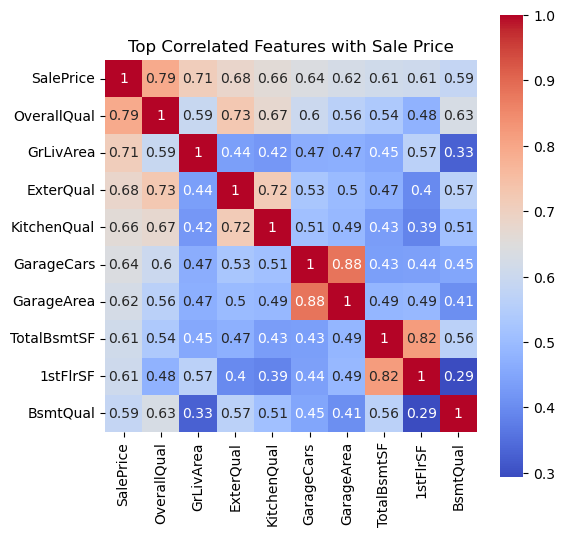

In [ ]:
corr = train.corr(numeric_only=True)
top_corr = corr['SalePrice'].sort_values(ascending=False).head(10)

plt.figure(figsize=(6,6))
sns.heatmap(corr.loc[top_corr.index, top_corr.index], annot=True, cmap="coolwarm", square=True)
plt.title("Top Correlated Features with Sale Price")
plt.show()


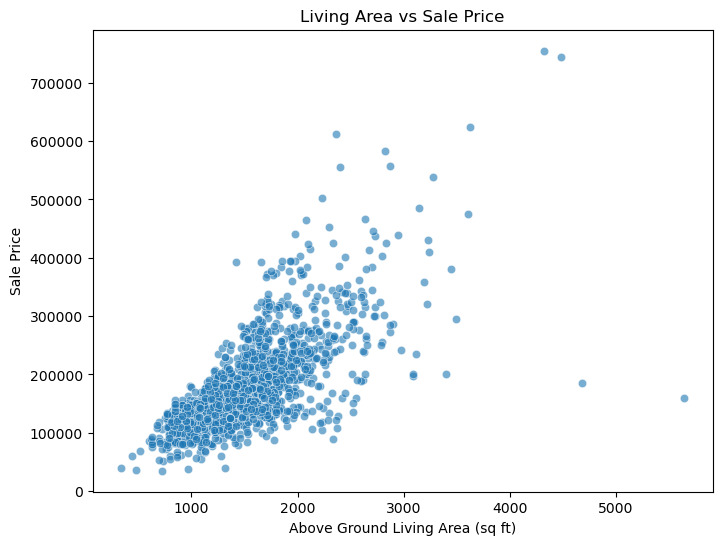

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train, alpha=0.6)
plt.title("Living Area vs Sale Price")
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price")

plt.show()


C:\Users\lloyduntalan\AppData\Local\Temp\ipykernel_20132\1548477418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallQual', y='SalePrice', data=train, palette="viridis")


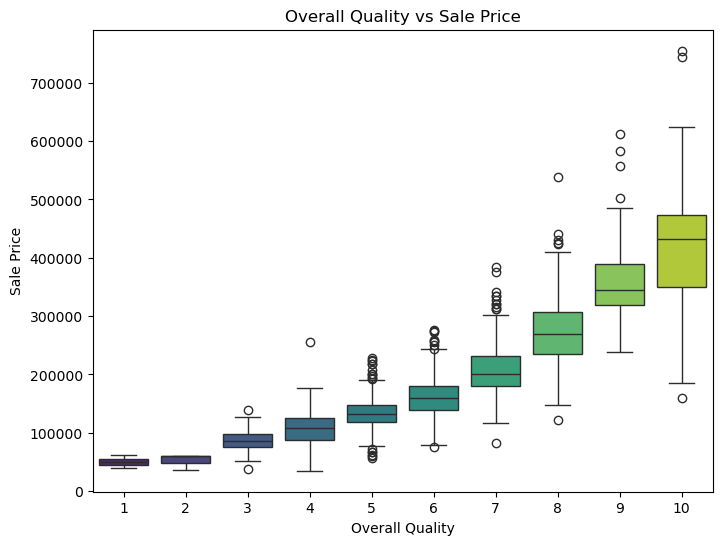

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train, palette="viridis")
plt.title("Overall Quality vs Sale Price")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()


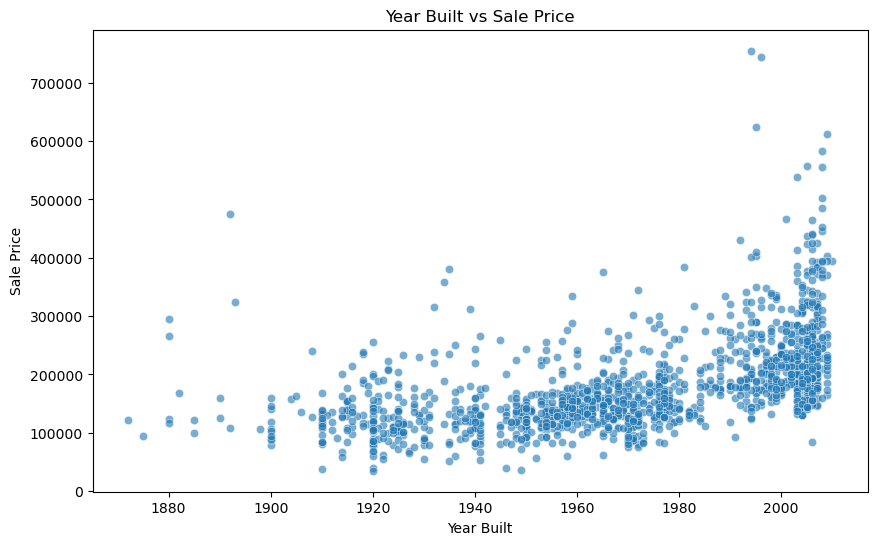

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train, alpha=0.6)
plt.title("Year Built vs Sale Price")
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.show()


In [ ]:
if "YearBuilt" in train.columns:
    train["DecadeBuilt"] = (train["YearBuilt"] // 10) * 10
    decade_price = train.groupby("DecadeBuilt")["SalePrice"].mean()
    print("Average Sale Price by Decade Built:")
    print(decade_price)

Average Sale Price by Decade Built:
DecadeBuilt
1870    108000.000000
1880    170425.571429
1890    216316.666667
1900    129828.400000
1910    131511.482759
1920    123268.350515
1930    144415.833333
1940    126887.481013
1950    140935.670659
1960    153852.640000
1970    152828.335106
1980    190080.327869
1990    228404.220859
2000    242046.416021
2010    394432.000000
Name: SalePrice, dtype: float64


In [ ]:
if "OverallQual" in train.columns:
    quality_group = train.groupby("OverallQual")["SalePrice"].mean()
    print("Average SalePrice by OverallQual:")
    print(quality_group)

Average SalePrice by OverallQual:
OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64


In [ ]:
if "GrLivArea" in train.columns:
    train["PricePerSF"] = train["SalePrice"] / train["GrLivArea"]
    print("Price Per Square Foot Summary:")
    print(train["PricePerSF"].describe())


Price Per Square Foot Summary:
count    1460.000000
mean      120.572878
std        31.391081
min        28.358738
25%        99.822008
50%       120.099031
75%       138.700041
max       276.250881
Name: PricePerSF, dtype: float64
